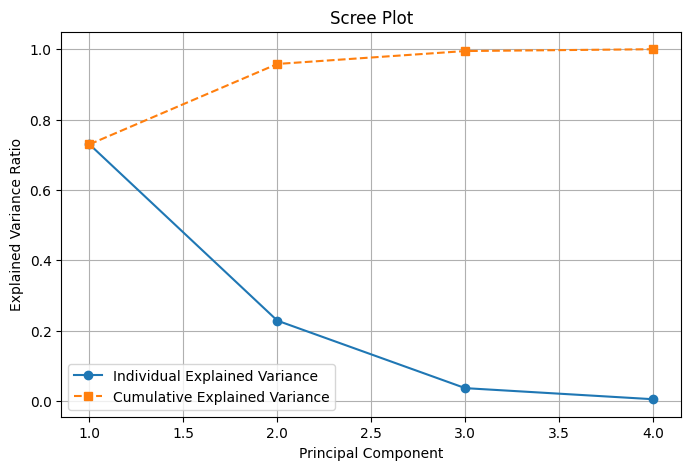

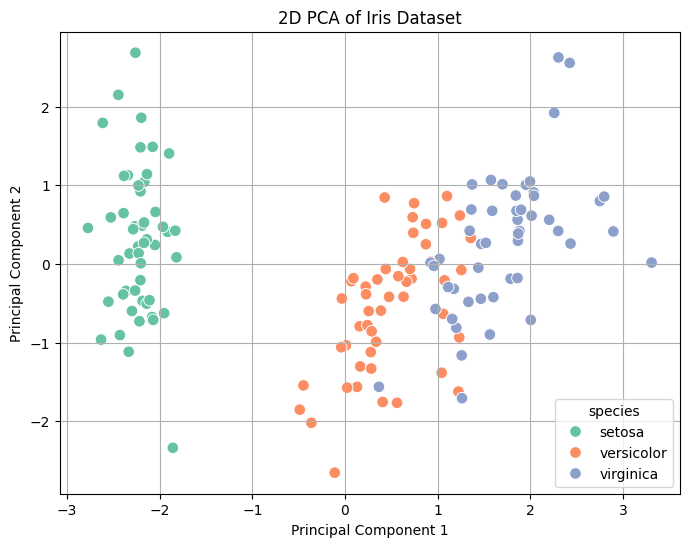

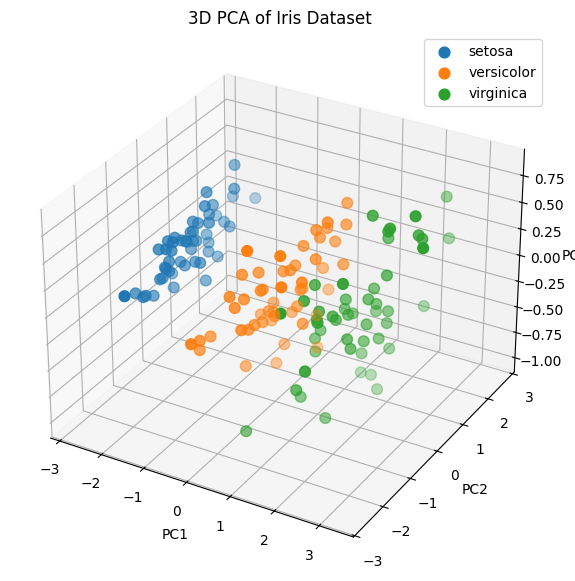

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 4: Scree Plot (explained variance)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'o-', label='Individual Explained Variance')
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, 's--', label='Cumulative Explained Variance')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Reduce dimensions to 2 components
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Step 6: 2D Scatter Plot
df_pca = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
df_pca['species'] = [target_names[i] for i in y]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='species', palette='Set2', s=70)
plt.title('2D PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Optional Step 7: 3D Visualization
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for species_idx, species_name in enumerate(target_names):
    ax.scatter(
        X_pca_3d[y == species_idx, 0],
        X_pca_3d[y == species_idx, 1],
        X_pca_3d[y == species_idx, 2],
        label=species_name,
        s=60
    )

ax.set_title("3D PCA of Iris Dataset")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.legend()
plt.show()


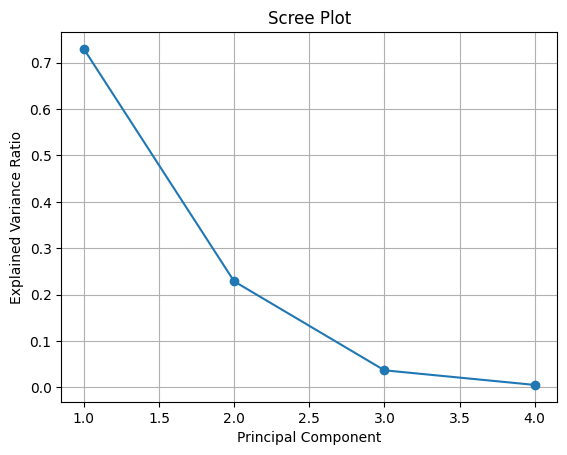

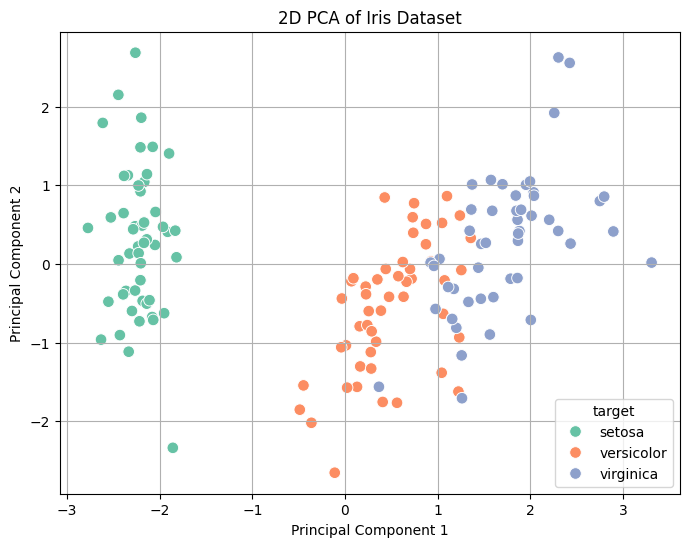

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize the features
X_std = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_std)

# Scree Plot
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Reduce to 2 dimensions for visualization
X_pca_2d = PCA(n_components=2).fit_transform(X_std)
df = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
df['target'] = y

# 2D Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue=df['target'].map(dict(enumerate(target_names))),
                palette='Set2', s=70)
plt.title('2D PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


✅ PCA Viva Preparation Tutorial
🎯 1. What is PCA?
PCA stands for Principal Component Analysis.

It is a dimensionality reduction technique.

It converts correlated features into uncorrelated principal components.

It helps in simplifying data while preserving maximum variance.

📌 Keywords: dimensionality reduction, principal components, variance

🧠 2. Why use PCA?
To reduce number of features.

To remove redundant (correlated) features.

To visualize high-dimensional data in 2D/3D.

To improve model performance and reduce overfitting.

📌 Keywords: redundancy removal, visualization, overfitting control

⚙️ 3. PCA Working Steps (Conceptual)
Standardize the data.

Compute Covariance Matrix.

Calculate Eigenvalues and Eigenvectors.

Sort Eigenvalues in descending order.

Choose top-k eigenvectors (principal components).

Project data on these components.

📌 Keywords: standardization, covariance, eigenvectors, projection

🔣 4. PCA Formulae
Standardization:
𝑍
=
𝑋
−
𝜇
𝜎
Z=
σ
X−μ
​


Covariance Matrix:
Σ
=
1
𝑛
−
1
𝑍
𝑇
𝑍
Σ=
n−1
1
​
 Z
T
 Z

Eigenvalue Equation:
Σ
𝑣
=
𝜆
𝑣
Σv=λv

Projection:
𝑋
𝑛
𝑒
𝑤
=
𝑍
⋅
𝑊
𝑘
X
new
​
 =Z⋅W
k
​


📌 Keywords: standardization, covariance, eigen-decomposition

📐 5. What are Principal Components?
They are new axes formed by eigenvectors.

They are orthogonal and uncorrelated.

Each component explains some amount of variance in data.

📌 Keywords: orthogonal, uncorrelated, maximum variance

💡 6. Properties of PCA
It is unsupervised.

Principal components are linear combinations of original features.

Each subsequent component is orthogonal to the previous.

PCA doesn't guarantee interpretability.

📌 Keywords: linear, unsupervised, orthogonality

📊 7. Difference Between PCA and LDA

PCA	LDA
Unsupervised	Supervised
Maximizes variance	Maximizes class separation
Doesn’t need class labels	Needs class labels
📌 Keywords: unsupervised vs supervised

✍️ 8. Example Viva Questions
Q: What is the purpose of PCA?
A: To reduce dimensionality while retaining maximum variance in the data.

Q: What is a principal component?
A: It is a linear combination of original features that captures maximum variance.

Q: Why do we use eigenvalues and eigenvectors in PCA?
A: Eigenvectors give directions (PCs), and eigenvalues show the amount of variance captured.

Q: What if we don’t standardize the data before PCA?
A: Features with large scales will dominate the variance, leading to biased components.

Q: Is PCA supervised or unsupervised?
A: PCA is unsupervised.

Q: What does a higher eigenvalue mean?
A: It means that the corresponding principal component captures more variance.

📝 9. Short Notes for Flashcards

Term	Meaning
Covariance Matrix	Measures feature relationships
Eigenvalue	Variance explained by the component
Eigenvector	Direction of principal component
Scree Plot	Plot of eigenvalues
k Principal Components	Top k directions with highest variance
🧑‍🏫 10. One-Line Oral Answers (for quick viva)
PCA reduces dimensions by projecting data on new axes.

Principal components are orthogonal.

We use covariance matrix to capture relationships.

Eigenvectors are principal components.

Higher eigenvalue → more variance explained.

Would you like a printable one-pager or flashcards PDF for PCA viva prep?
